## *Classification of Bank Deposits: A Decision Tree Model for Yes/No Prediction*

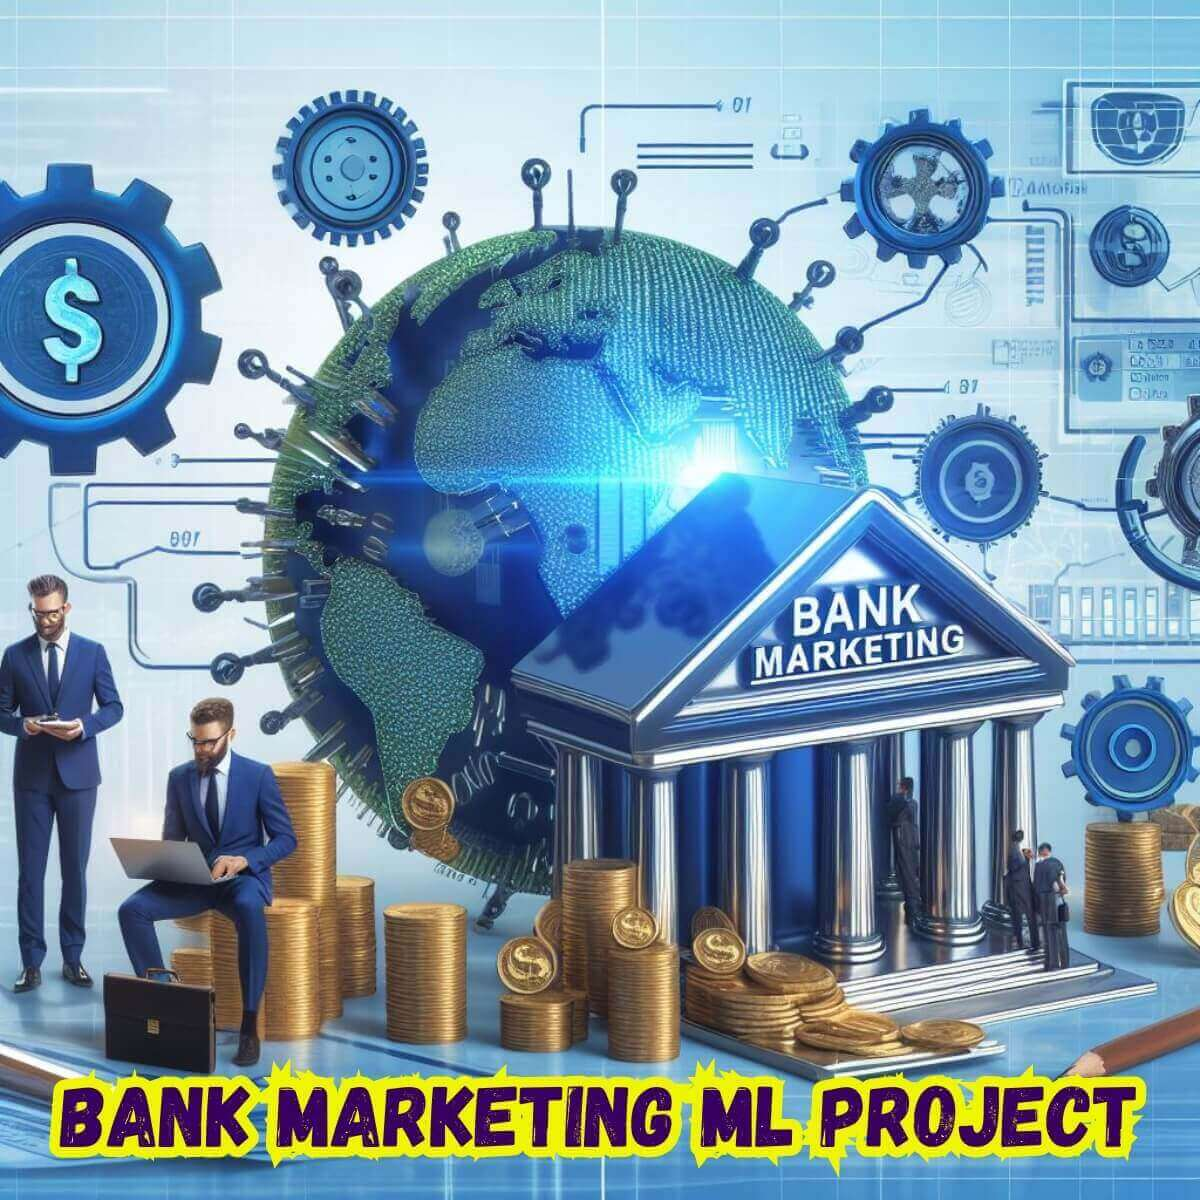

In [2579]:
from IPython.display import Image

# Display the image with specified width and height
Image(r"C:\Users\Admin\Desktop\download.jpeg", width=600, height=300
      )

#### 📊 `Dataset Overview`

#### **Introduction to the Dataset**
-This dataset focuses on **direct marketing campaigns** conducted by a **Portuguese banking institution**. The bank’s goal was to promote its **term deposit product** through phone calls to existing customers. A **term deposit** (or fixed deposit) is a savings account where customers lock in a set amount of money for a fixed period, earning higher interest rates than regular accounts. The money can't be withdrawn early without incurring penalties, making it ideal for secure, higher returns. This product is particularly beneficial for customers seeking stable, long-term savings.

#### **Data Description and Classification Goal**
The dataset contains **demographic** (age, job, marital status) and **behavioral** (previous interactions, loan status, contact duration) information of customers contacted during marketing campaigns. The **classification goal** is to predict whether a customer will **subscribe to a term deposit** (i.e., "yes" or "no") based on these features.

The dataset is suitable for **machine learning classification tasks**, containing a mix of **categorical** and **numerical** features to identify patterns in customer behavior and preferences.

#### **Dataset Details**
- **Total Records**: The dataset consists of **11,163 rows** and **21 columns**, where each row represents a customer, and each column contains features about the customer and their interactions with the bank.
- **Features**: The columns include demographic and behavioral attributes, as well as the outcome (`y`), which indicates whether the customer subscribed to a term deposit.
  
#### **Project Scope**
For this project, a subset of the dataset will be used to **build a predictive model** using a **Decision Tree classifier**. The sample size will be selected for efficient computation and accurate predictions, while ensuring a representative selection of the full dataset.



---

### **Aim of the Project**

The primary goal of this project is to build a **predictive model** that can accurately determine whether a customer will subscribe to a term deposit, based on their demographic and behavioral characteristics. By analyzing these customer features, the project aims to **optimize the bank’s marketing efforts** and improve conversion rates.

A **Decision Tree Classifier** will be used to create the predictive model. This classifier will identify the most significant factors that influence a customer’s decision to subscribe, allowing the bank to better tailor its marketing strategies.

The project will apply this model to a *customer data* to assess the effectiveness of using customer characteristics to predict subscription likelihood. The findings will help improve marketing efficiency and guide decision-making for future campaigns.

## *A Decision Tree Model classifer*

### *Importing necessary libraries*


In [2580]:
#type:ignore
import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns      # Advanced visualization
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder    # For encoding categorical variables
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.tree import DecisionTreeClassifier,plot_tree       # Decision Tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from imblearn.over_sampling import SMOTE              # For handling imbalanced data


import warnings                        # For handling warnings in the code
warnings.filterwarnings("ignore") 

### *Load the data set*

In [2581]:
# Load the dataset
Bank = pd.read_csv('bank.csv')

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
Bank.head()


Dataset loaded successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### *Coloumn names*

In [2582]:
# checking coloumuns of the data set
Bank.columns   

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### **Overview of the Columns in the Dataset**

#####  Description of the columns in the dataset:

- **age**: The customer’s age. Age can influence financial decision-making. Older individuals may be more inclined to secure financial products like term deposits due to retirement planning, while younger customers may have different priorities.
  
- **job**: The customer’s job type (e.g., "admin.", "blue-collar", "technician", etc.). This can provide insights into income level and job stability, which may affect the likelihood of subscribing to a term deposit.
  
- **campaign**: The number of contacts made during the current marketing campaign. A higher number of contacts suggests persistent efforts to engage the customer, potentially increasing the likelihood of subscription.

- **pdays**: The number of days since the customer was last contacted. A value of -1 means the customer has never been contacted before. Recent contact may be crucial in gauging customer receptiveness to the offer.

- **previous**: The number of contacts made during the previous campaign. This helps assess the history of interactions and can indicate the customer’s familiarity or fatigue with the marketing efforts.

- **poutcome**: The outcome of the previous marketing campaign (e.g., "failure", "success", "nonexistent"). Previous successes may encourage future subscription, while failures could decrease the effectiveness of further campaigns.

- **deposit (y)**: The target variable indicating whether the customer subscribed to a term deposit ("yes" or "no"). This is the outcome the model will predict.

- **default**: Whether the customer has a history of defaulting on credit or loan payments ("yes" or "no"). A history of default may suggest financial instability and influence their likelihood of subscribing to a term deposit.


 - **housing**: Whether the customer has a housing loan ("yes" or "no"). A housing loan can reduce financial flexibility, making it less likely that the customer will subscribe to a term deposit.

- **loan**: Whether the customer has a personal loan ("yes" or "no"). Similar to a housing loan, a personal loan could affect the customer’s ability to invest in a term deposit due to ongoing financial commitments.

- **marital**: The customer’s marital status (e.g., "married", "single", "divorced"). Marital status may influence financial priorities, with married individuals or those with children possibly having different savings goals.

- **education**: The customer’s education level (e.g., "primary", "secondary", "tertiary"). Education level can correlate with financial literacy, potentially influencing interest in term deposits.

- **balance**: The customer’s average yearly balance in euros. A higher balance suggests greater financial stability, which may increase the likelihood of investing in a term deposit.

- **contact**: The type of communication used to contact the customer (e.g., "cellular", "telephone"). The contact method can influence the effectiveness of the campaign, as personal communication might be more engaging.

- **day**: The day of the month when the customer was last contacted. The timing of the contact can affect the customer’s response, depending on factors like availability and financial timing.

- **month**: The month when the customer was last contacted. Seasonal factors could influence decision-making, with certain months potentially offering more favorable conditions for customers to invest in term deposits.

## *Data cleaning*

In [2583]:
# exploring the datatype of each column
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### *Milestone 1 : There is no missing values*

#### *Checking duplicates*

In [2584]:
# Check for duplicates
duplicates = Bank.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


#### *Handling Outliers by lower bound and upper bound*

##### *Capping Outliers  Using IQR Method*

In [2585]:
# Step 1: Calculate the first and third quartile
Q1 = np.percentile(Bank['balance'], 25)
Q3 = np.percentile(Bank['balance'], 75)

#Step 2: Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [2586]:
# Step 3: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [2587]:
# Step 5: Print the lower and upper bounds
print("----------------------------------------")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("----------------------------------------")

----------------------------------------
Lower Bound: -2257.0
Upper Bound: 4087.0
----------------------------------------


In [2588]:
# Step 6: Identify and remove the outliers
Bank_data = Bank[(Bank['balance'] >= lower_bound) & ( Bank['balance'] <= upper_bound)]

# Step 7: Print the data without outliers
print("Data after removing outliers:")
Bank_data.head()

Data after removing outliers:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## *Expostory Data anaylis*

### *Descriptive Statistics*

##### *Show summary statistics of the numerical columns*

In [2589]:
# get quick peek of the dataset
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000
mean,40.897596,809.882557,15.593945,368.650836,2.517364,51.309291,0.816068
std,11.736322,997.790839,8.441658,346.480771,2.707008,109.635799,2.243602
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,94.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,443.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1228.000000,22.000000,489.500000,3.000000,2.000000,1.000000
max,95.000000,4087.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


#### Dataset Summary
---

- **`Age`**:  
   The age of individuals in this dataset ranges from **18** to **95** years, with an average age of approximately **40.9** years. The spread, represented by the standard deviation of **11.74** years, indicates moderate variability in age, meaning that most individuals are within a range of around 23 years from the average.

- **`Balance`**:  
   The balance values range from **-2049** to **4087**, with an average balance of **809.88**. The high spread, with a standard deviation of **997.79**, suggests substantial variability in account balances, meaning some individuals have much higher or lower balances than the average.

-  **`Duration`**:  
   The duration of the last contact varies from **2** seconds to **3881** seconds. The average duration is approximately **368.65** seconds (about **6 minutes**), with a standard deviation of **346.48**, indicating that some calls are significantly longer than the average. The wide range suggests a mix of short and long interactions.

-  **`Campaign`**:  
   The number of contacts made during this campaign ranges from **1** to **43**, with an average of **2.52** contacts. The standard deviation of **2.71** shows variability in the number of contacts, with most clients being contacted fewer than 3 times.

- **`Pdays`**:  
   The number of days since a client was last contacted ranges from **-1** to **854**, with a standard deviation of **109.64**. A value of **-1** indicates that many clients were never contacted previously. This large variation shows that some clients have not been contacted for a long time, while others were contacted more recently.

- **`Previous`**:  
   The number of contacts with a client before this campaign ranges from **0** to **58**, with a standard deviation of **2.24**. Most clients (75th percentile at **0**) had no prior contact, suggesting that the majority of individuals had no previous interactions with the bank before this campaign.

---

### Overall Summary:
The dataset includes a diverse range of economic, demographic, and campaign-related variables. It reveals that most clients had minimal prior contact with the bank, with many having no previous interactions. The data also shows a wide variation in account balances and contact durations, reflecting a diverse customer base.


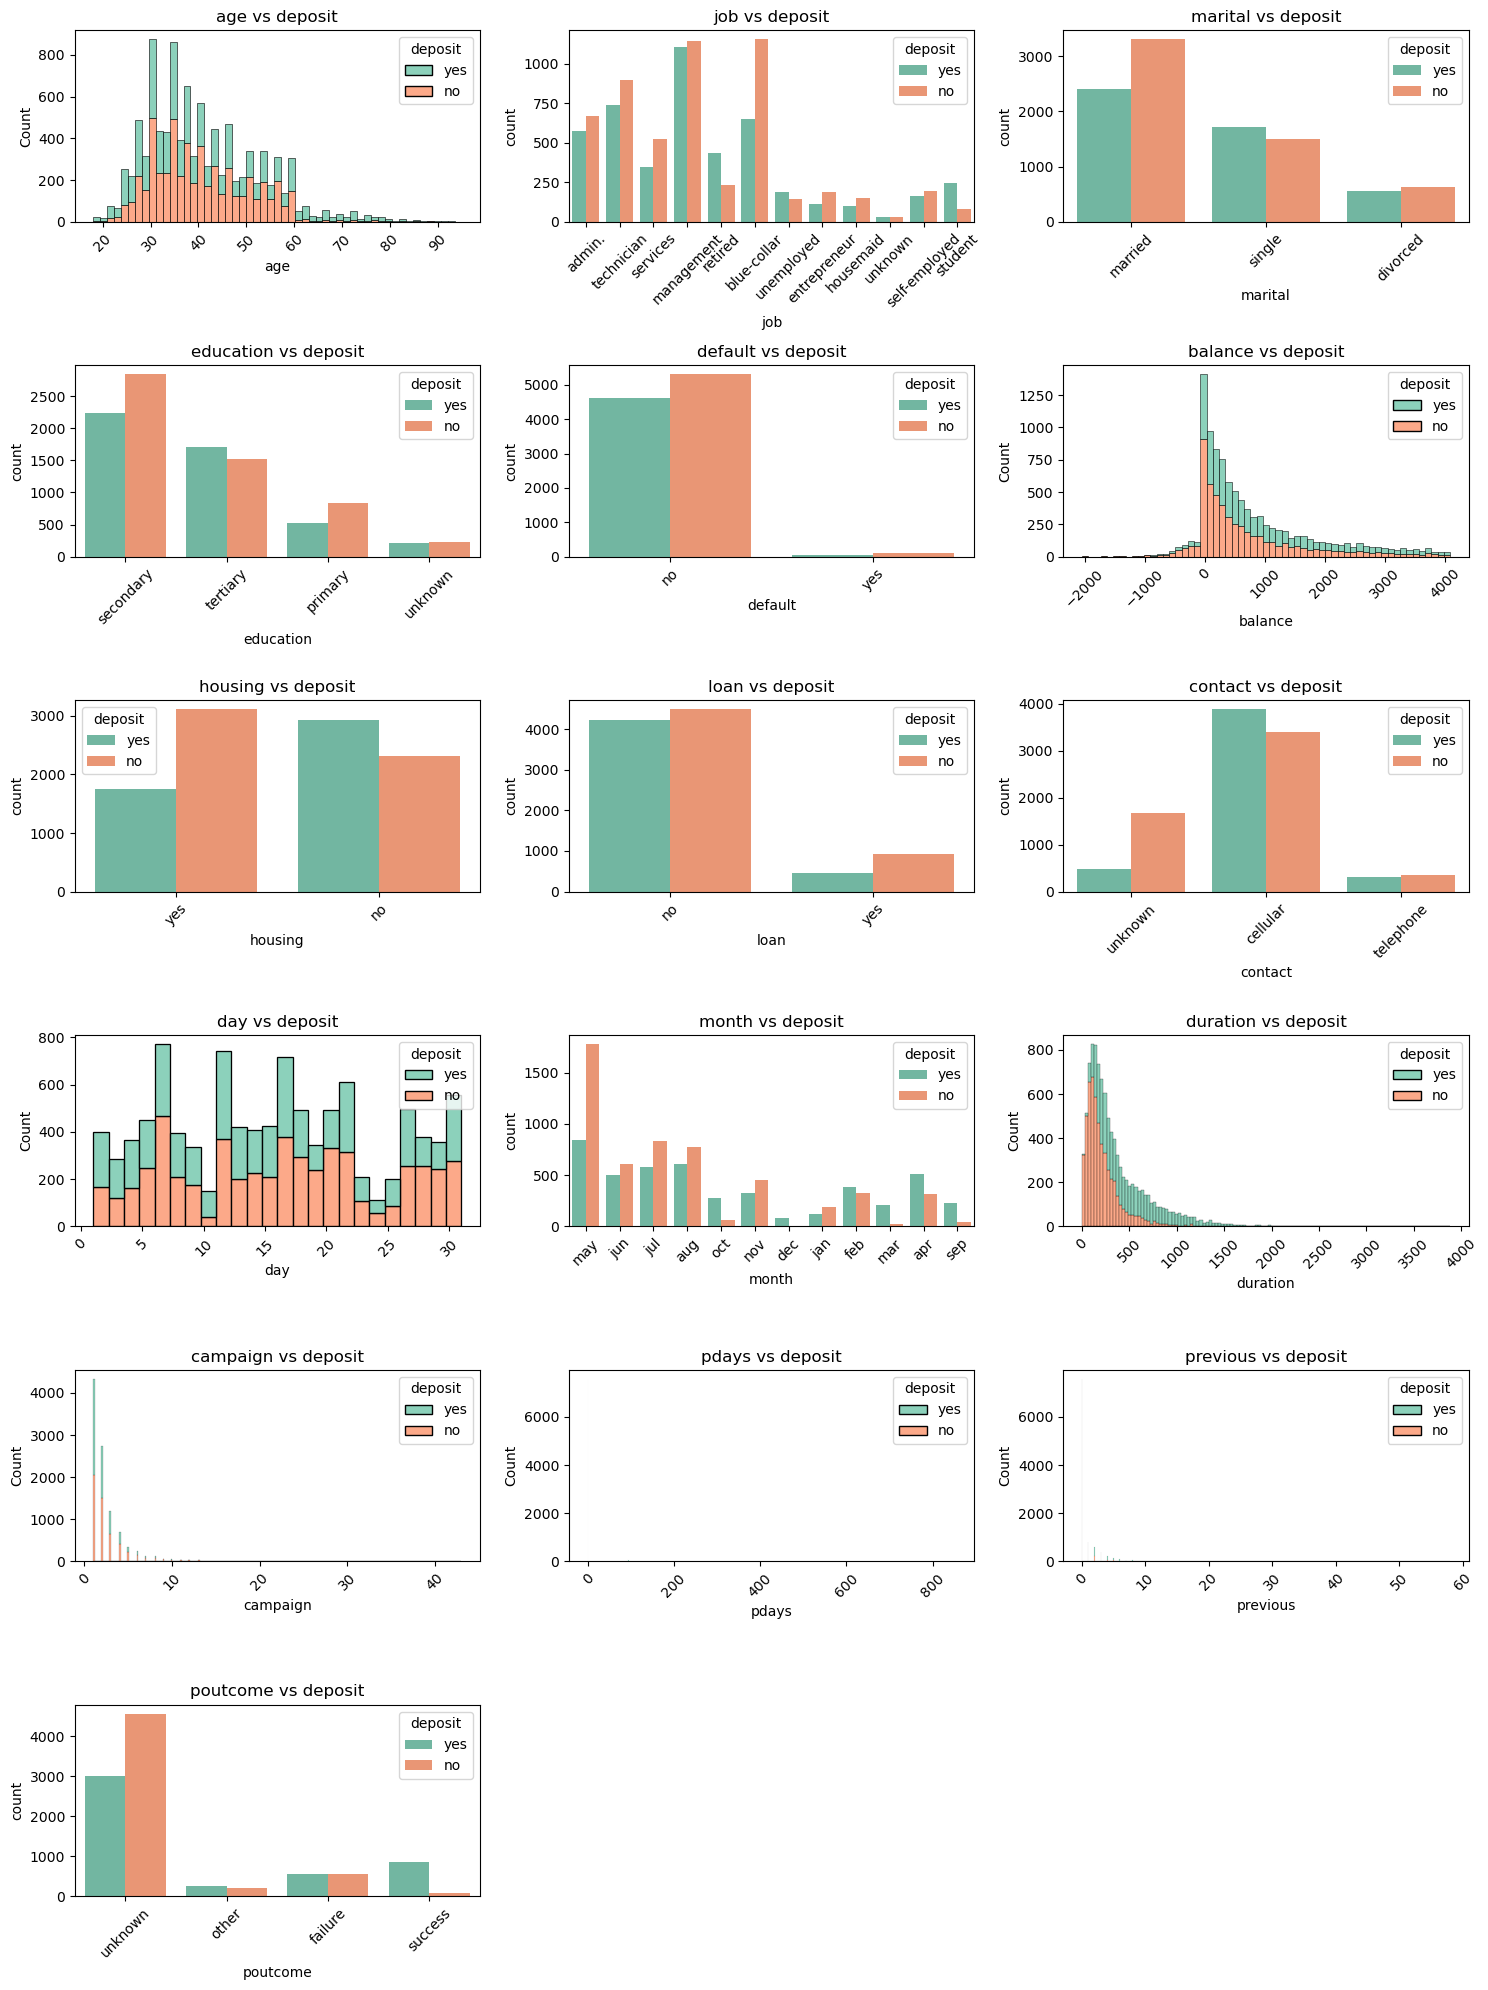

In [2590]:
# Set the figure size
plt.figure(figsize=(15, 20))

# Define the color palette
palette = 'Set2'

# List of columns to plot against 'deposit'
columns_to_plot = Bank_data.columns.drop('deposit')

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 3, i)  # Adjust grid layout if needed
    if Bank_data[column].dtype == 'object':  # Categorical data
        sns.countplot(x=column, hue='deposit', data=Bank_data, palette=palette)
    else:  # Numerical data
        # Ensure hue is specified in histplot and palette is applied correctly
        sns.histplot(data=Bank_data, x=column, hue='deposit', multiple="stack", palette=palette, kde=False)
    
    plt.title(f'{column} vs deposit')
    plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



### *Data Preprocessing*

In [2591]:
# Check for unique values in the target column ('deposit')
print('Unique values in the target column (deposit):')
print(Bank['deposit'].value_counts())

Unique values in the target column (deposit):
deposit
no     5873
yes    5289
Name: count, dtype: int64


#### *Encoding Categorical Features*

In [2592]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values =     Bank_data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'other' 'failure' 'success']
Unique values in 'deposit': ['yes' 'no']


In [2593]:
# Suppress the SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

#### *Encoding the Categorical Columns: Label encoder*

In [2594]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['education', 'default', 'housing', 'loan','deposit']

# Encode categorical columns
for col in categorical_columns:
    Bank_data[col] = label_encoder.fit_transform(Bank_data[col])


<!-- #### *Why Label Encoding?*

- **Binary columns** like `default`, `housing`, `loan`, and `deposit` contain two categories: "yes" or "no," making them suitable for Label Encoding. In this case, Label Encoding maps the categories to integer values (e.g., "yes" becomes 1 and "no" becomes 0).

- **Ordinal column** like `education` represents categories that have a natural order (e.g., "primary" < "secondary" < "tertiary"). Label Encoding works well here by mapping each category to an integer (e.g., "primary" = 0, "secondary" = 1, "tertiary" = 2). This preserves the inherent order of the categories. -->

#### *Encoding the Categorical Columns: One-Hot Encoding*

In [2595]:
# Apply One-Hot Encoding to the rest of the categorical columns
Bank_data = pd.get_dummies(Bank_data, columns=['job', 'marital', 'contact', 'month', 'poutcome'], drop_first=False)

#### *Why One-Hot Encoding?*

- **Nominal data**: Columns like `job`, `marital`, `contact`, `month`, and `poutcome` represent nominal data, meaning the values have no inherent order or ranking. In such cases, **One-Hot Encoding** is appropriate because it ensures that each category is treated as a separate entity, avoiding the risk of algorithms misinterpreting the encoded integers as having a numeric relationship.

- **drop_first=False**: By setting `drop_first=False`, we do not drop the first category for each column. If `drop_first=True`, one category would be dropped to avoid **multicollinearity**, which can be problematic when building certain machine learning models. Since we are not dropping the first category here, all original categories will have their corresponding columns.


#### *Checking coloumuns after Encoding*

In [2596]:
# Check the first few rows after encoding
Bank_data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

#### *Encoding Mappings for Categorical Variables*
---
`Why encoding:`
- Machine Learning Models Require Numeric Input:Most machine learning algorithms (like linear regression, decision trees, and neural networks) require numerical data as input. Categorical variables (like "job", "marital status", "education", etc.) are in text format, which cannot be processed directly by these models.

- Encoding converts categories into numerical values, making it possible for the model to interpret and use the information.

---

### *Feature Engineering*

#### *Age Category*

In [2597]:
Bank_data['age_category'] = pd.cut(Bank_data['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

##### *How it works*
---
- pd.cut() divides the age values into specified ranges (bins).
- bins=[0, 25, 35, 45, 55, 65, 100] specifies the age ranges.
- labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'] assigns a category label to each range.

---

#### *Balance Category*

In [2598]:
Bank_data['balance_category'] = pd.cut(Bank_data['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['Negative', 'Low', 'Medium', 'High'])

#### *How it works:*
---
- pd.cut() divides balance values into ranges using bins.
- bins=[-np.inf, 0, 1000, 5000, np.inf] defines the ranges: from negative to 0 (Negative), 0 to 1000 (Low), 1000 to 5000 (Medium), and greater than 5000 (High).

---

#### *Duration Category*

In [2599]:
Bank_data['duration_category'] = pd.cut(Bank_data['duration'], bins=[0, 100, 300, 600, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

#### *How it works:*
- pd.cut() divides duration values into predefined bins.

- bins=[0, 100, 300, 600, np.inf] specifies the ranges: from 0 to 100 seconds (Short), 100 to 300 seconds (Medium), 300 to 600 seconds (Long), and above 600 seconds (Very Long).

#### *Previous Interaction*

In [2600]:
Bank_data['previous_interaction'] = Bank_data['previous'].apply(lambda x: 'No Interaction' if x == 0 else 'Interaction')

#### *How it works*
- apply(lambda x: 'No Interaction' if x == 0 else 'Interaction') applies a lambda function to the previous column.

- If the value is 0, it indicates no previous interaction, so "No Interaction" is assigned.
- Any other value means there was an interaction, so "Interaction" is assigned.

#### *Campaign Type*

In [2601]:
Bank_data['campaign_type'] = Bank_data['campaign'].apply(lambda x: 'Low' if x <= 5 else 'High')

#### *How it works:*
- apply(lambda x: 'Low' if x <= 5 else 'High') applies a lambda function to each value in the campaign column.

- If the value of campaign is 5 or less, it will be labeled as "Low", otherwise "High".

#### *Encoding the coloumuns:*

In [2602]:
# Encode the Data
def encode (Bank_data):
    for col in Bank_data.columns:
        if Bank_data[col].dtype == 'object' or Bank_data[col].dtype == 'category':
            le = LabelEncoder()
            Bank_data[col] = le.fit_transform(Bank_data[col])
    return Bank_data
Bank_data = encode(Bank_data)

#### *Display the DataFrame with the New Columns*

In [2603]:
Bank_data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_category,balance_category,duration_category,previous_interaction,campaign_type
0,59,1,0,2343,1,0,5,1042,1,-1,...,False,False,False,False,True,3,1,3,1,1
1,56,1,0,45,0,0,5,1467,1,-1,...,False,False,False,False,True,3,0,3,1,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,False,False,False,False,True,1,1,3,1,1
3,55,1,0,2476,1,0,5,579,1,-1,...,False,False,False,False,True,2,1,0,1,1
4,54,2,0,184,0,0,5,673,2,-1,...,False,False,False,False,True,2,0,3,1,1


### *Model Selection and Evaluation*

##### *Check for class imbalance*

In [2604]:
print(Bank_data['deposit'].value_counts(normalize=True))

deposit
0    0.536559
1    0.463441
Name: proportion, dtype: float64


#### *Spliting the data in `features` and `Target`*

In [2605]:
# Features (X) and Target (y)
X = Bank_data.drop('deposit', axis=1)  # Features (all columns except 'deposit')
y = Bank_data['deposit']              # Target (the 'deposit' column)

# Splitting the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f'Training Features Shape: {X_train.shape}')
print(f'Testing Features Shape: {X_test.shape}')

Training Features Shape: (8085, 50)
Testing Features Shape: (2022, 50)


#### *Explanation:*
---
- In machine learning, the data into `features (X)` and the `target variable (y)` to define what we’re trying to predict based on other information. 

- Training Set: This subset is used to train the model, allowing it to learn patterns from the data.
- Testing Set: This subset is kept separate to evaluate the model’s performance on unseen data, ensuring its predictions generalize well.
- This approach prevents overfitting and helps us gauge the model’s effectiveness
---

### *Model Building*

In [2606]:
# # Define the parameters for Decision Tree Classifier
dt_params = {'criterion': 'gini', 
             'max_depth': 10, 
             'max_features': None, 
             'min_samples_leaf': 6, 
             'min_samples_split':100 }


# Define the parameters for Random Forest Classifier
dt = DecisionTreeClassifier(**dt_params, random_state=8)

# Fitting the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=100,
                       random_state=8)

#### *Model prediction*

In [2607]:
# Make predictions using the trained model
y_pred = dt.predict(X_test)

# Check the first few predictions
print(y_pred[:10])

[0 1 1 0 1 1 1 1 0 1]


#### *Model Evaluation*

In [2608]:
# Predict using the trained model
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy=accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.38%


##### checking rightfit , overfit and underfit

In [2609]:
dt.score(X_train,y_train)

0.8512059369202226

#### `Conclusion :`
- The data is right fit

### *Confusion Matrix*

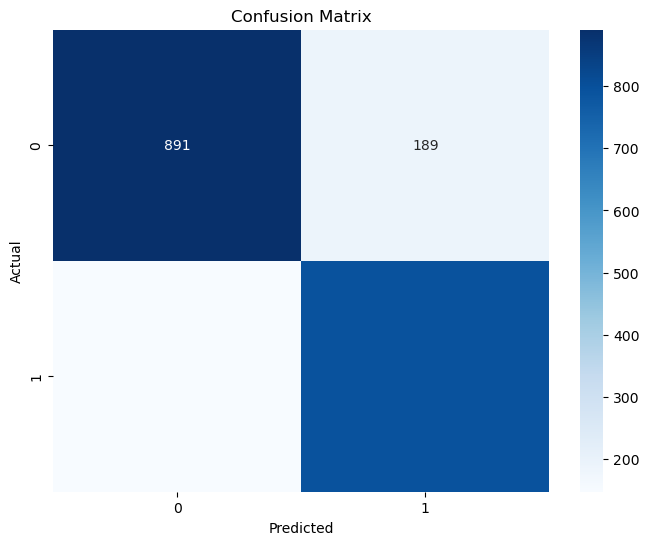

In [2610]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test   and y_pred
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### *Classification Report*

In [2611]:
# Classification Report
print('classification_report:')
print(classification_report(y_test, y_pred, target_names=['No Deposit', 'Subscribed']))

classification_report:
              precision    recall  f1-score   support

  No Deposit       0.86      0.82      0.84      1080
  Subscribed       0.81      0.84      0.83       942

    accuracy                           0.83      2022
   macro avg       0.83      0.83      0.83      2022
weighted avg       0.83      0.83      0.83      2022



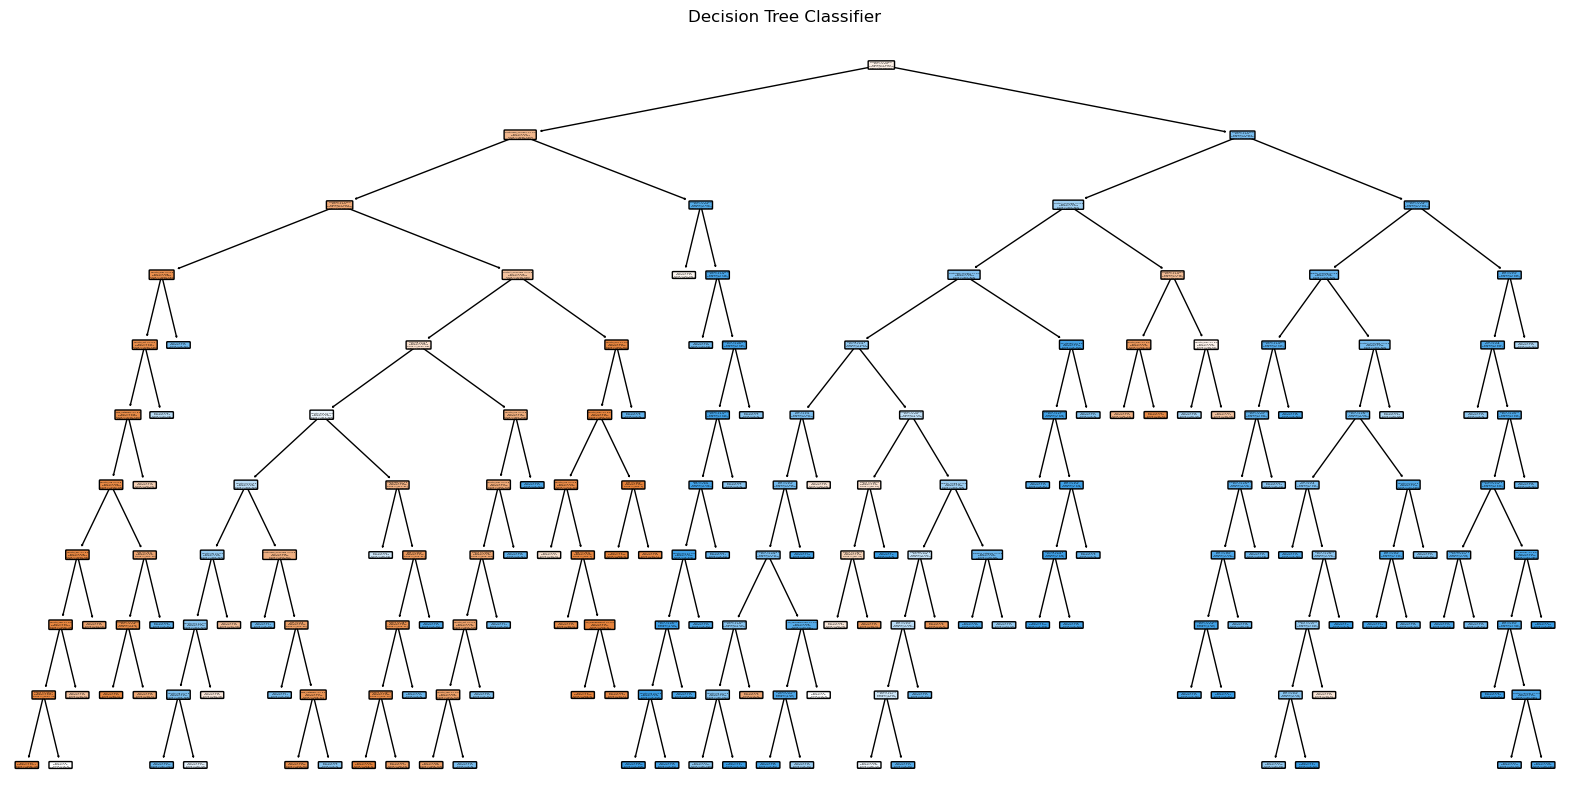

In [2612]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Subscribed'], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()